In [44]:
# lets import the important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# lets import the iris data 

dt = pd.read_csv('C:/Users/GS/OneDrive/Desktop/Python/Project ( Linear and Logistic Regression)/Linear+Regression+and+Logistic+Regression+in+Python/Clusttering/iris.csv')

In [46]:
dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
# check the unique values in Species
dt['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
## it means we have 3 different groups but we have to prove this through clustering.

In [49]:
# lets take the numeric data only.

dt1 = dt[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [50]:
dt1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

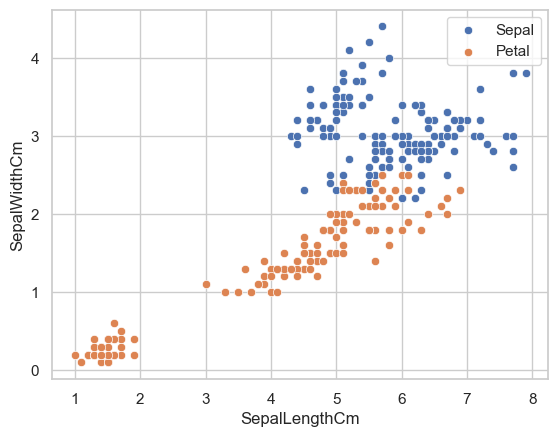

In [51]:
# lets plot these columns on scatter plot 
sns.set(style='whitegrid')
sns.scatterplot(x='SepalLengthCm',y= 'SepalWidthCm',data = dt1,label='Sepal')
sns.scatterplot(x='PetalLengthCm',y= 'PetalWidthCm',data = dt1,label='Petal')


C:\Users\GS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


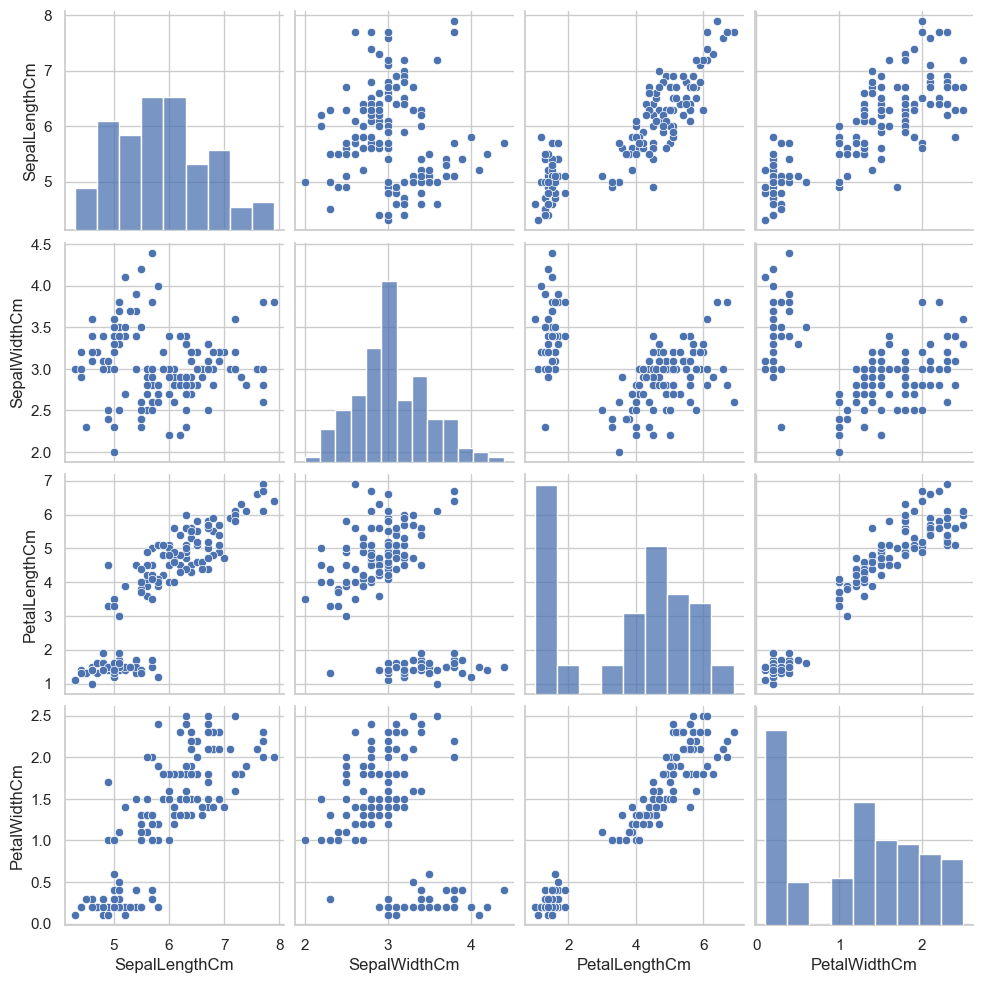

In [52]:
# lets plot the pairplot on dataset.
sns.pairplot(dt1)

In [53]:
# lets use sklearn for clustering.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
# Instantiate model, assume k =3
k_means = KMeans(n_clusters = 3, random_state = 42)

In [55]:
k_means.fit(dt1)

C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [56]:
## This returns a model object that has "learned" the data. We can now call its different attributes 
## to see inertia, location of centroids, and class labels, among others

In [57]:
# lets look at the cluster and inertia

print(k_means.labels_,k_means.inertia_)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 78.940841426146


In [58]:
k_means.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [59]:
## it creates a no. which indicates that the value position can be identified through their centroid symbol (like 0,1,2).

In [60]:
## This inertia value is not helpful but it should be compare with other k value's inertia to verify its importance.

In [61]:
# lets create a function which calculates the kmeans from k= 2 to 10.
numcluster = [i for i in range(2,11)]

def iter(numcluster,x_val):
    inertia = []
    for number in numcluster:
        kmeans1 = KMeans(n_clusters=number,random_state = 42)
        kmeans1.fit(x_val)
        inertia.append(kmeans1.inertia_)
    return inertia

In [62]:
inertias = iter(numcluster,dt1)

C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [63]:
inertias

[152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.53558205128205,
 38.930963049671746,
 34.36020891600984,
 30.023416358198972,
 28.14550248961776,
 25.95154437229438]

<function matplotlib.pyplot.show(close=None, block=None)>

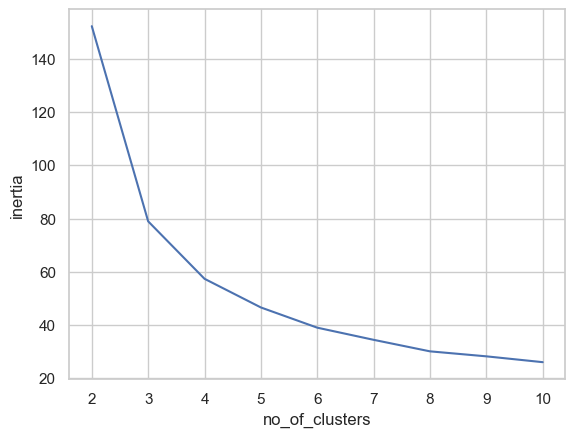

In [64]:
# lets plot the no. of centroid and inertias
sns.lineplot(x =numcluster, y= inertias)
plt.xlabel('no_of_clusters')
plt.ylabel('inertia')
plt.show

In [65]:
## It shows that at k=3 the sudden decline means that the data points are well settled in these 3 
## clusters because after that the inertia value has not decreased significantly.

In [66]:
# lets check the possibilities of different value of k through silhouette_score

silhouette_scores = silhouette_score(dt1,k_means.labels_)
silhouette_scores

0.5525919445499757

In [67]:
# however this single value is not helpful lets create a function to measure all the possible silhouette_score

def score(numclusters,x_val):
        sil_score = []
        for numbers in numclusters:
            kms = KMeans(n_clusters = numbers, random_state = 42)
            kms.fit(x_val)
            sil_score.append(silhouette_score(x_val,kms.labels_))
        return sil_score

In [68]:
silscore= score(numcluster,dt1)

C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [69]:
silscore

[0.6808136202936816,
 0.5525919445499757,
 0.4978256901095472,
 0.4885175508886279,
 0.3682056968271308,
 0.354844796668611,
 0.35210904015153155,
 0.3434023443520119,
 0.31859832045160874]

<function matplotlib.pyplot.show(close=None, block=None)>

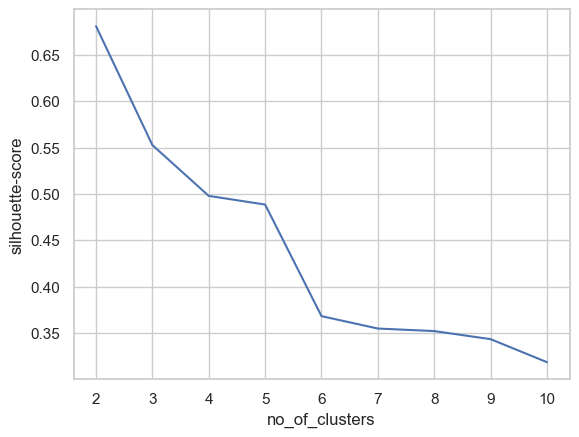

In [70]:
# lets plot the line chart between no. of centroid and silhouette_score
sns.lineplot(x=numcluster, y =silscore )
plt.xlabel('no_of_clusters')
plt.ylabel('silhouette-score')
plt.show

In [71]:
## As we know the value of silhouette should be nearer to 1 which indicates a better no. of clusters 
## of provided data so at k=3 and k=4, k=3 has the highest silhouette value. K=2 is not considered as at this k=2, the 
## inertia is high as compared to other k value's inertia.


In [72]:
# now we have to check the class label and k means label appropriately.

dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
avg= dt.groupby(['Species']).agg(SepalLengthCm = ('SepalLengthCm','mean'),SepalWidthCm =('SepalWidthCm','mean'),PetalLengthCm =('PetalLengthCm','mean'),PetalWidthCm =('PetalWidthCm','mean'))

In [74]:
avg

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [75]:
k_means.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [76]:
## it shows that Iris-versicolor belong to k=0 centriod and the Iris-setosa belongs to k=1, and the last one respectively.

In [77]:
k_labels= k_means.labels_
k_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

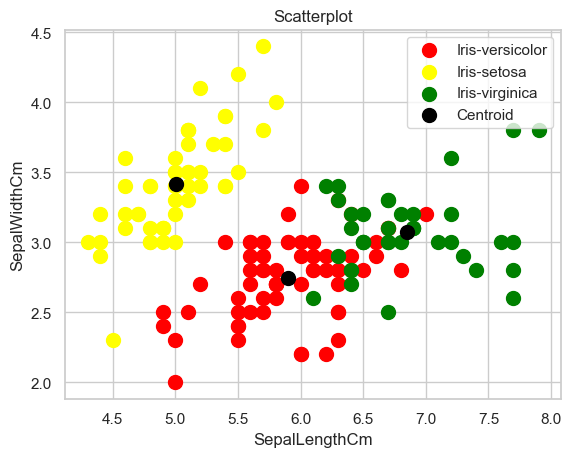

In [78]:
# Lets create a scatter plot to label the respective names to specific k values.
plt.scatter(dt1.iloc[k_labels==0,[0]],dt1.iloc[k_labels==0,[1]],s =100,c='red',label='Iris-versicolor')
plt.scatter(dt1.iloc[k_labels==1,[0]],dt1.iloc[k_labels==1,[1]],s =100,c='yellow',label='Iris-setosa')
plt.scatter(dt1.iloc[k_labels==2,[0]],dt1.iloc[k_labels==2,[1]],s =100,c='green',label='Iris-virginica')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=100, color='black',label = 'Centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Scatterplot')
plt.legend()
plt.show